# Tutorial 4 - Python For Data Analysis 🐍 

---

## Web Scraping 🐙

### *Table of Contents*

- Regular Expression Operations 🔎
  - [Exercise 1](#exercise-1) : Regex
- Parsing the HTML with BeautifulSoup 🐼
  - [Exercice 2](#exercise-2) : Use Case n°1
  - [Exercise 3](#exercise-3) : Use case n°2

### Requirements

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('default')
params = {'axes.spines.top' : 'False',
          'axes.spines.bottom' : 'False',
          'axes.spines.left' : 'False',
          'axes.spines.right' : 'False',
          'axes.facecolor' : (1,1,1,0),
          'axes.edgecolor' : (1,1,1,0),
          'xtick.color' : (1,1,1,0),
          'ytick.color' : (1,1,1,0),
          'figure.figsize': [8, 8], 
          'figure.dpi' : 75, 
          }
plt.rcParams.update(params)

In [ ]:
plt.style.use('default')

## Regular Expression Operations

<a name="exercise-1">

### Exercise 1 : Regex
---

A **regular expression** is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.

Python has a built-in package called re, which can be used to work with Regular Expres- sions.

You can find details here: https://docs.python.org/3/library/re.html#regular-expression-syntax

#### 1) Import the re module

In [ ]:
import re

#### 2) Write a regexp to extract the score, Cristiano's age, number of goals, and the number of selections from the following text:

`Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale.`

In [ ]:
txt = "Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale."

In [ ]:
score = re.search( r'\(\d-\d\)',txt).group()
print('score: ' + score)

age = re.search(r'\d+ ans', txt).group()
print('age: ' + age)

nb_buts = re.search(r'\d+ buts', txt).group()
print('nb buts: ' + nb_buts)

nb_selections = re.search(r'\d+ matchs', txt).group()
print('nb selections: ' + nb_selections)

score: (3-0)
age: 36 ans
nb buts: 112 buts
nb selections: 181 matchs


#### 3) Write a regexp to get prices from the following text:

`Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande.`

In [ ]:
txt = "Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande."

In [ ]:
prix = re.findall(r'\+ euros', txt)

for i in prix:
    print(i)

230 euros
900 euros


#### 4) Write a regexp to get reduction values, along with promo code:

`40% sur tous les réservoirs d'essence et collecteurs d'échappement (achats internet uniquement) avec le code promo : PRINTEMPS
40% sur tous les carénages plastique (achats internet uniquement) avec le code promo : CARENAGE40
50% sur toutes les rampes d'injection (achats internet uniquement) avec le code promo : INJECTION50

In [ ]:
txt = """
40% sur tous les réservoirs d'essence et collecteurs d'échappement ( achats internet uniquement ) avec le code promo: PRINTEMPS
40% sur tous les carénages plastique  ( achats internet uniquement ) avec le code promo: CARENAGE40
50% sur toutes les rampes d'injection ( achats internet uniquement ) avec le code promo: INJECTION50
"""

In [ ]:
code_promo = re.findall(r'le code promo: (\S+)', txt)
pourcentage = re.findall(r'\d+\%', txt)
print(pourcentage, code_promo)

dictionnaire = dict(zip(code_promo, pourcentage))
print(dictionnaire)

['40%', '40%', '50%'] ['PRINTEMPS', 'CARENAGE40', 'INJECTION50']
{'PRINTEMPS': '40%', 'CARENAGE40': '40%', 'INJECTION50': '50%'}


## Parsing the HTML with BeautifulSoup

BeautifulSoup is a Python library for parsing HTML and XML documents. It is often used for web scraping. BeautifulSoup transforms a complex HTML document into a complex tree of Python objects, such as tag, navigable string, or comment.

Import the BeautifulSoup class from the bs4 module:

`from bs4 import BeautifulSoup

Use case 1: https://www.afm-telethon.fr/telethon/bref/parrains-resultats-telethon-1379


In [ ]:
from bs4 import BeautifulSoup

<a name="exercise-2">

### Exercise 2 : Use Case n°1
---


#### 1) Query the website and return the html into the variable `page

In [ ]:
url = "https://www.afm-telethon.fr/telethon/bref/parrains-resultats-telethon-1379"
page = requests.get(url)

#### 2) Parse the html using beautiful soup and store in variable `soup

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

#### 3) Save the Soup variable output into an HTML file and open it using web browser.

What do you remark?

In [ ]:
with open('SOUP.html', 'w') as f:
    f.write(str(soup))

It's an HTML file

#### 4) In 2006, the counter reached its highest level. Extract this information from the webpage.

PS: do not use the table

In [ ]:
soup.select("#contenu-froid-main-content > div.field.field-name-body.field-type-text-with-summary.field-label-hidden > div > div > p:nth-of-type(4)")[0].get_text()

"C'est en 2006 que le compteur a atteint son niveau le plus haut, avec\xa0106 696 532 €."

Extract the same information using the selector then using the HTML tag.

#### 5) Retrieve the publication date from the webpage, using the CSS classes.

In [ ]:
date = soup.select(".datePublication")[0].get_text()
datefinale = re.findall(r'\d+\/\d+\/\d+', date)
print(datefinale[0])

04/07/2021


#### 6) Retrieve the number of days remaining until the next telethon from the webpage.

In [ ]:
for i in soup.select('.hidden'):
  print(i.get_text())

J-11


#### 7) Retrieve all hidden inputs from the webpage

In [ ]:
tag =  soup.find_all('input',type='hidden') 
for i in tag:
    print(i)

NameError: ignored

#### 8) Find the number of tables defined in the soup. Retrieve this table from the webpage.

In [ ]:
tables = soup.select('table')
print(len(tables))

1


In [ ]:
print(tables)

[<table border="0" style="width: 1096px; height: 1035px;"><tbody><tr><td class=" txt-petit">Année</td>
<td class=" txt-petit">Parrain</td>
<td class=" txt-petit">
<p>Montant collecté</p>
</td>
</tr><tr><td class="fdLigneTableau">1987</td>
<td class="fdLigneTableau">Jerry LEWIS</td>
<td class="fdLigneTableau">29 650 000 €</td>
</tr><tr><td>1988</td>
<td>Mireille MATHIEU</td>
<td>28 490 000 €</td>
</tr><tr><td class="fdLigneTableau">1989</td>
<td class="fdLigneTableau">Alain DELON</td>
<td class="fdLigneTableau">40 930 000 €</td>
</tr><tr><td>1990</td>
<td>Claudia CARDINALE</td>
<td>46 510 000 €</td>
</tr><tr><td class="fdLigneTableau">1991</td>
<td class="fdLigneTableau">Jerry LEWIS, Mireille MATHIEU et Ornella MUTTI</td>
<td class="fdLigneTableau">38 650 000 €</td>
</tr><tr><td>1992</td>
<td>Barbara HENDRICKS</td>
<td>47 870 000 €</td>
</tr><tr><td class=" fdLigneTableau">1993</td>
<td class=" fdLigneTableau">Michel SARDOU</td>
<td class=" fdLigneTableau">55 600 000 €</td>
</tr><tr><td

#### 9) Retrieve the items from this table. Create a python dataframe representing this table (don't forget to include the name of the columns as defined in the webpage)

In [ ]:
df = pd.read_html(page.content,header=0)[0]
df

,Année,Parrain,Montant collecté
0,1987,Jerry LEWIS,29 650 000 €
1,1988,Mireille MATHIEU,28 490 000 €
2,1989,Alain DELON,40 930 000 €
3,1990,Claudia CARDINALE,46 510 000 €
4,1991,"Jerry LEWIS, Mireille MATHIEU et Ornella MUTTI",38 650 000 €
5,1992,Barbara HENDRICKS,47 870 000 €
6,1993,Michel SARDOU,55 600 000 €
7,1994,Pierre PERRET,57 520 000 €
8,1995,Serge LAMA,56 763 000 €
9,1996,Thierry LHERMITTE,56 872 000 €


#### 10) Visualize the evolution of the amount collected per year.

In [ ]:
df['Montant collecté'] = [s.replace('€','') for s in df['Montant collecté']]
df['Montant collecté'] = [s.replace(' ','') for s in df['Montant collecté']]
df['Année'] = df['Année'].astype(int)
df['Montant collecté'] = df['Montant collecté'].astype(int)
df

,Année,Parrain,Montant collecté
0,1987,Jerry LEWIS,29650000
1,1988,Mireille MATHIEU,28490000
2,1989,Alain DELON,40930000
3,1990,Claudia CARDINALE,46510000
4,1991,"Jerry LEWIS, Mireille MATHIEU et Ornella MUTTI",38650000
5,1992,Barbara HENDRICKS,47870000
6,1993,Michel SARDOU,55600000
7,1994,Pierre PERRET,57520000
8,1995,Serge LAMA,56763000
9,1996,Thierry LHERMITTE,56872000


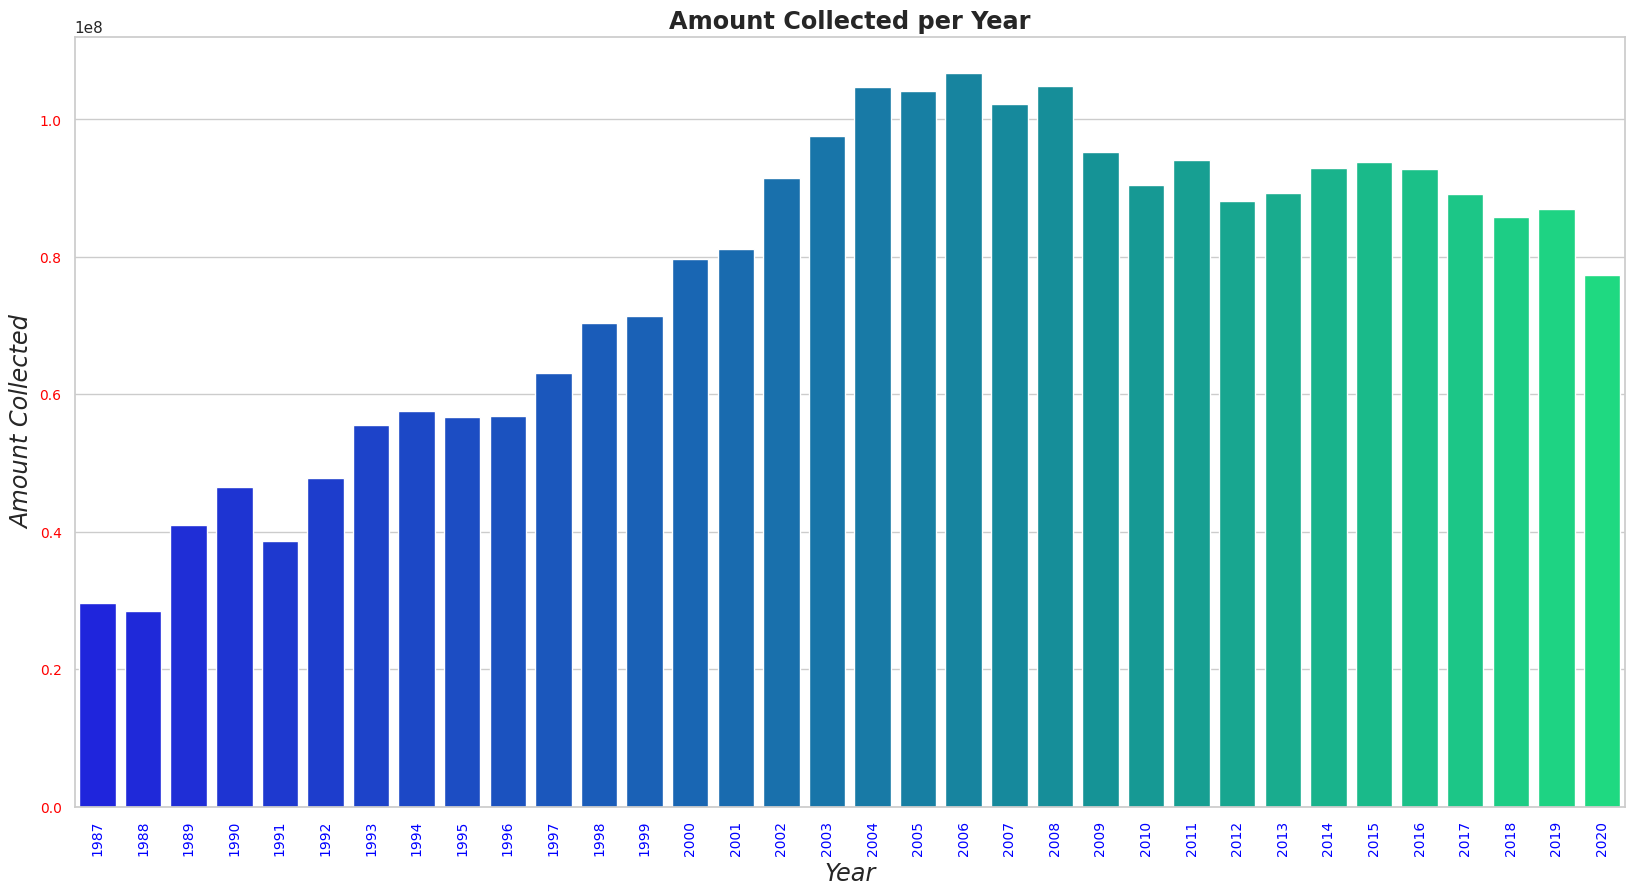

In [ ]:
sns.set(style="whitegrid",rc={'figure.figsize':(20, 10)})
axis = sns.barplot(df['Année'],df['Montant collecté'],palette = 'winter')
plt.title("Amount Collected per Year", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Year", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Amount Collected", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 90, "color":"blue", "fontsize":"smaller"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"red", "fontsize":"smaller"}
plt.setp(axis.get_yticklabels(), **properties2)
plt.show()

#### 11) Mark the maximum and minimum of the evolution with respectively red and green colors.

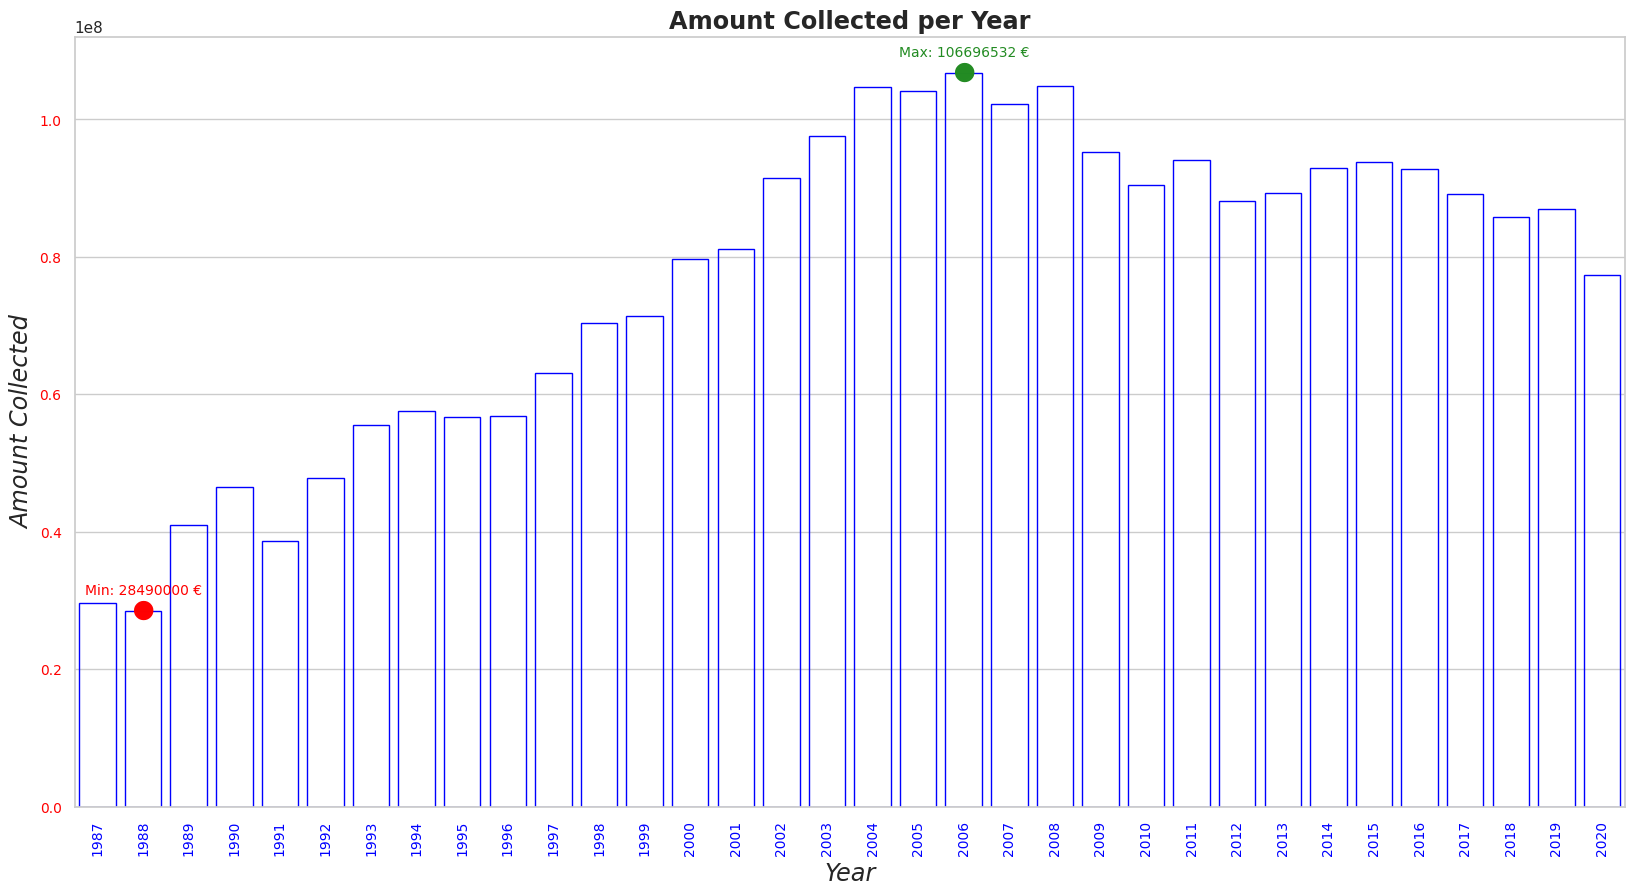

In [ ]:
sns.set_theme(style='whitegrid',rc={'figure.figsize':(20, 10)})

axis = sns.barplot(df['Année'],df['Montant collecté'],color = 'white',edgecolor = 'blue',fill = False)
plt.title("Amount Collected per Year", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Year", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Amount Collected", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 90, "color":"blue", "fontsize":"smaller"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"red", "fontsize":"smaller"}
plt.setp(axis.get_yticklabels(), **properties2)

for rect in axis.patches:
    height = int(rect.get_height())
    if height == max(df['Montant collecté']):
      axis.annotate(f'Max: {int(height)} €', xy=(rect.get_x()+rect.get_width()/2, height+0.01e8), 
                  xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', **{"rotation" : 0, "color":"forestgreen", "fontsize":10})
      axis.annotate(f'⚫', xy=(rect.get_x()+rect.get_width()/2-0.075, height-0.022e8), 
                  xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', **{"rotation" : 90, "color":"forestgreen", "fontsize":30})
    if height == min(df['Montant collecté']):
      axis.annotate(f'Min: {int(height)} €', xy=(rect.get_x()+rect.get_width()/2, height+0.01e8), 
                  xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', **{"rotation" : 0, "color":"red", "fontsize":10})
      axis.annotate(f'⚫', xy=(rect.get_x()+rect.get_width()/2-0.075, height-0.022e8), 
                  xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', **{"rotation" : 90, "color":"red", "fontsize":30})

plt.show()

#### 12) Bonus Question : We expect the graph below:

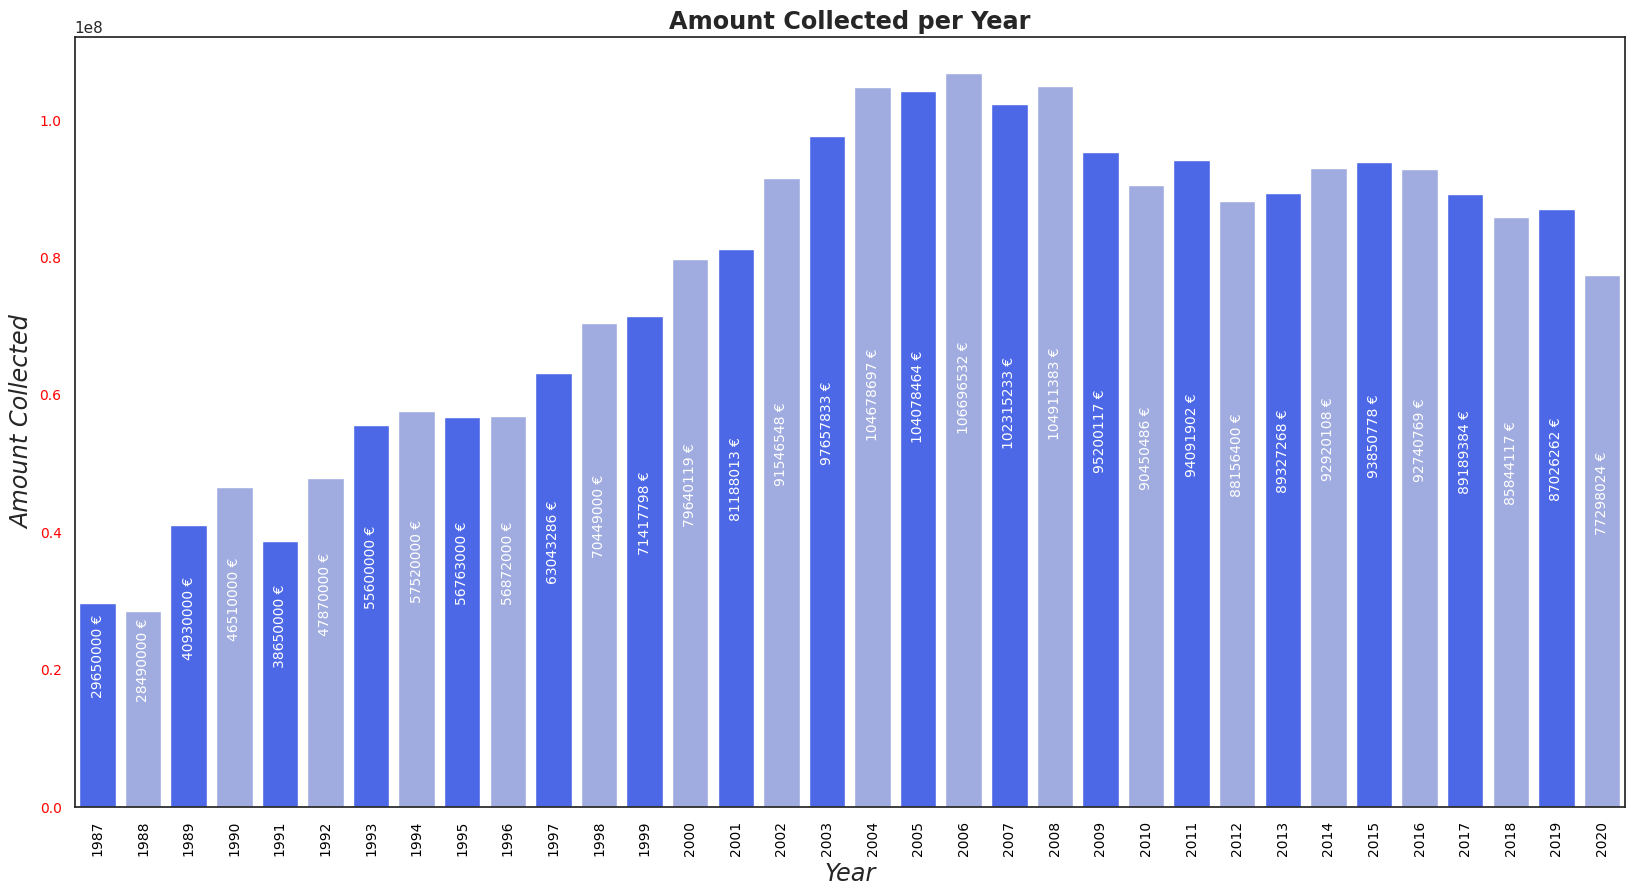

In [ ]:
sns.set_theme(style="white",rc={'figure.figsize':(20, 10)})
colors = ["#3358FF","#95A5EB"]
axis = sns.barplot(df['Année'],df['Montant collecté'],palette = colors)
plt.title("Amount Collected per Year", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Year", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Amount Collected", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 90, "color":"black", "fontsize":"smaller"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"red", "fontsize":"smaller"}
plt.setp(axis.get_yticklabels(), **properties2)

for rect in axis.patches:
    height = rect.get_height()
    axis.annotate(f'{int(height)} €', xy=(rect.get_x()+rect.get_width()/2, height/2), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', **{"rotation" : 90, "color":"white", "fontsize":"smaller"})

plt.show()

<a name="exercise-3">

### Exercise 3 : Use Case n°2
---

Use case 2: https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html

#### 1) Store the html table in a dataframe

*Define a function that allows you to retrieve the value of row i and column j of the table*

In [ ]:
url2 = "https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html"
page2 = requests.get(url2)
pd.read_html(page2.content)+

[                          0                 1
 0  Département 75  Dept. 75             Paris
 1                  Altitude         75 mètres
 2               Coordonnées  48,82°N | 2,34°E
 3        Début des archives   9 décembre 1983
 4            Fuseau horaire      Europe/Paris
 5           Type de station      Météo-France,
    Heure locale          Unnamed: 1  ...   Pression Visibilité
 0           01h  add_circle_outline  ...    1023hPa      20 km
 1           00h  add_circle_outline  ...  1023.2hPa      20 km
 2           23h  add_circle_outline  ...  1023.0hPa      20 km
 3           22h  add_circle_outline  ...  1022.8hPa      20 km
 4           21h  add_circle_outline  ...  1022.2hPa      20 km
 5           20h  add_circle_outline  ...  1021.6hPa      20 km
 6           19h  add_circle_outline  ...  1021.1hPa      20 km
 7           18h  add_circle_outline  ...  1021.0hPa      20 km
 8           17h  add_circle_outline  ...  1020.8hPa      20 km
 9           16h  add_circle_o

In [ ]:
df2 = pd.read_html(page2.content)[1]
df2

,Heure locale,Unnamed: 1,Température,Pluie,Vent,Humidité,Bio-météo,Pt. de rosée,Pression,Visibilité
0,01h,add_circle_outline,13.9 °C 13.9 → 14.3,0 mm/1h,14 km/hraf.32.4,76%,NaN,9.7 °C,1023hPa,20 km
1,00h,add_circle_outline,14.3 °C 14.3 → 14.9,0 mm/1h,18 km/hraf.37.8,73%,NaN,9.5 °C,1023.2hPa,20 km
2,23h,add_circle_outline,14.9 °C 14.7 → 14.9,0 mm/1h,14 km/hraf.39.6,69%,NaN,9.3 °C,1023.0hPa,20 km
3,22h,add_circle_outline,14.8 °C 14.8 → 15.4,0 mm/1h,18 km/hraf.34.2,67%,NaN,8.7 °C,1022.8hPa,20 km
4,21h,add_circle_outline,15.4 °C 15.4 → 16.8,0 mm/1h,14 km/hraf.45.7,62%,NaN,8.2 °C,1022.2hPa,20 km
5,20h,add_circle_outline,16.8 °C 16.8 → 17.8,0 mm/1h,22 km/hraf.42.8,59%,81.0,8.7 °C,1021.6hPa,20 km
6,19h,add_circle_outline,17.7 °C 17.6 → 18.2,0 mm/1h,18 km/hraf.37.8,51%,144.0,7.4 °C,1021.1hPa,20 km
7,18h,add_circle_outline,17.8 °C 17.7 → 18.3,0 mm/1h,18 km/hraf.35.6,51%,192.0,7.5 °C,1021.0hPa,20 km
8,17h,add_circle_outline,18.3 °C 18.1 → 18.7,0 mm/1h,14 km/hraf.34.6,49%,311.0,7.4 °C,1020.8hPa,20 km
9,16h,add_circle_outline,18.3 °C 17.9 → 19,0 mm/1h,18 km/hraf.36.4,52%,378.0,8.3 °C,1020.7hPa,20 km


In [ ]:
def retrieve(i,j,tab):
  return tab.iloc[i,j]

#### 2) Explore the data using visualization libraries. Interpret & Conclude.

In [ ]:
myData = df2[['Pression','Humidité','Heure locale']]
myData['Pression'] = [s.replace('hPa','') for s in myData['Pression']]
myData['Humidité'] = [s.replace('%','') for s in myData['Humidité']]
myData['Heure locale'] = [s.replace('h','') for s in myData['Heure locale']]
myData[['Heure locale','Pression','Humidité']] = myData[['Heure locale','Pression','Humidité']].astype(float)
myData2 = myData.pivot_table(index=['Humidité'],columns = ['Heure locale'],values=['Pression'],fill_value=0)
myData2

Pression                        ...                              
Heure locale     0.0   1.0     2.0     3.0   ...    20.0    21.0    22.0  23.0
Humidité                                     ...                              
45.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
46.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
49.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
51.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
52.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
58.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
59.0              0.0     0     0.0     0.0  ...  1021.6     0.0     0.0     0
62.0              0.0     0     0.0     0.0  ...     0.0  1022.2     0.0     0
66.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
67.0              0.0     0     0.0     0.0  ...     0.0     0.0  1022.8     0
69.0              0.0     0  1021.6     0.0  ...     0.0     0.0     0.0  1023
73.0           1023.2     0     0.0     0.0  ...     0.0     0.0     0.0     0
76.0              0.0  1023     0.0     0.0  ...     0.0     0.0     0.0     0
77.0              0.0     0     0.0  1021.3  ...     0.0     0.0     0.0     0
80.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
81.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
82.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
83.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
84.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
85.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0
86.0              0.0     0     0.0     0.0  ...     0.0     0.0     0.0     0

[21 rows x 24 columns]

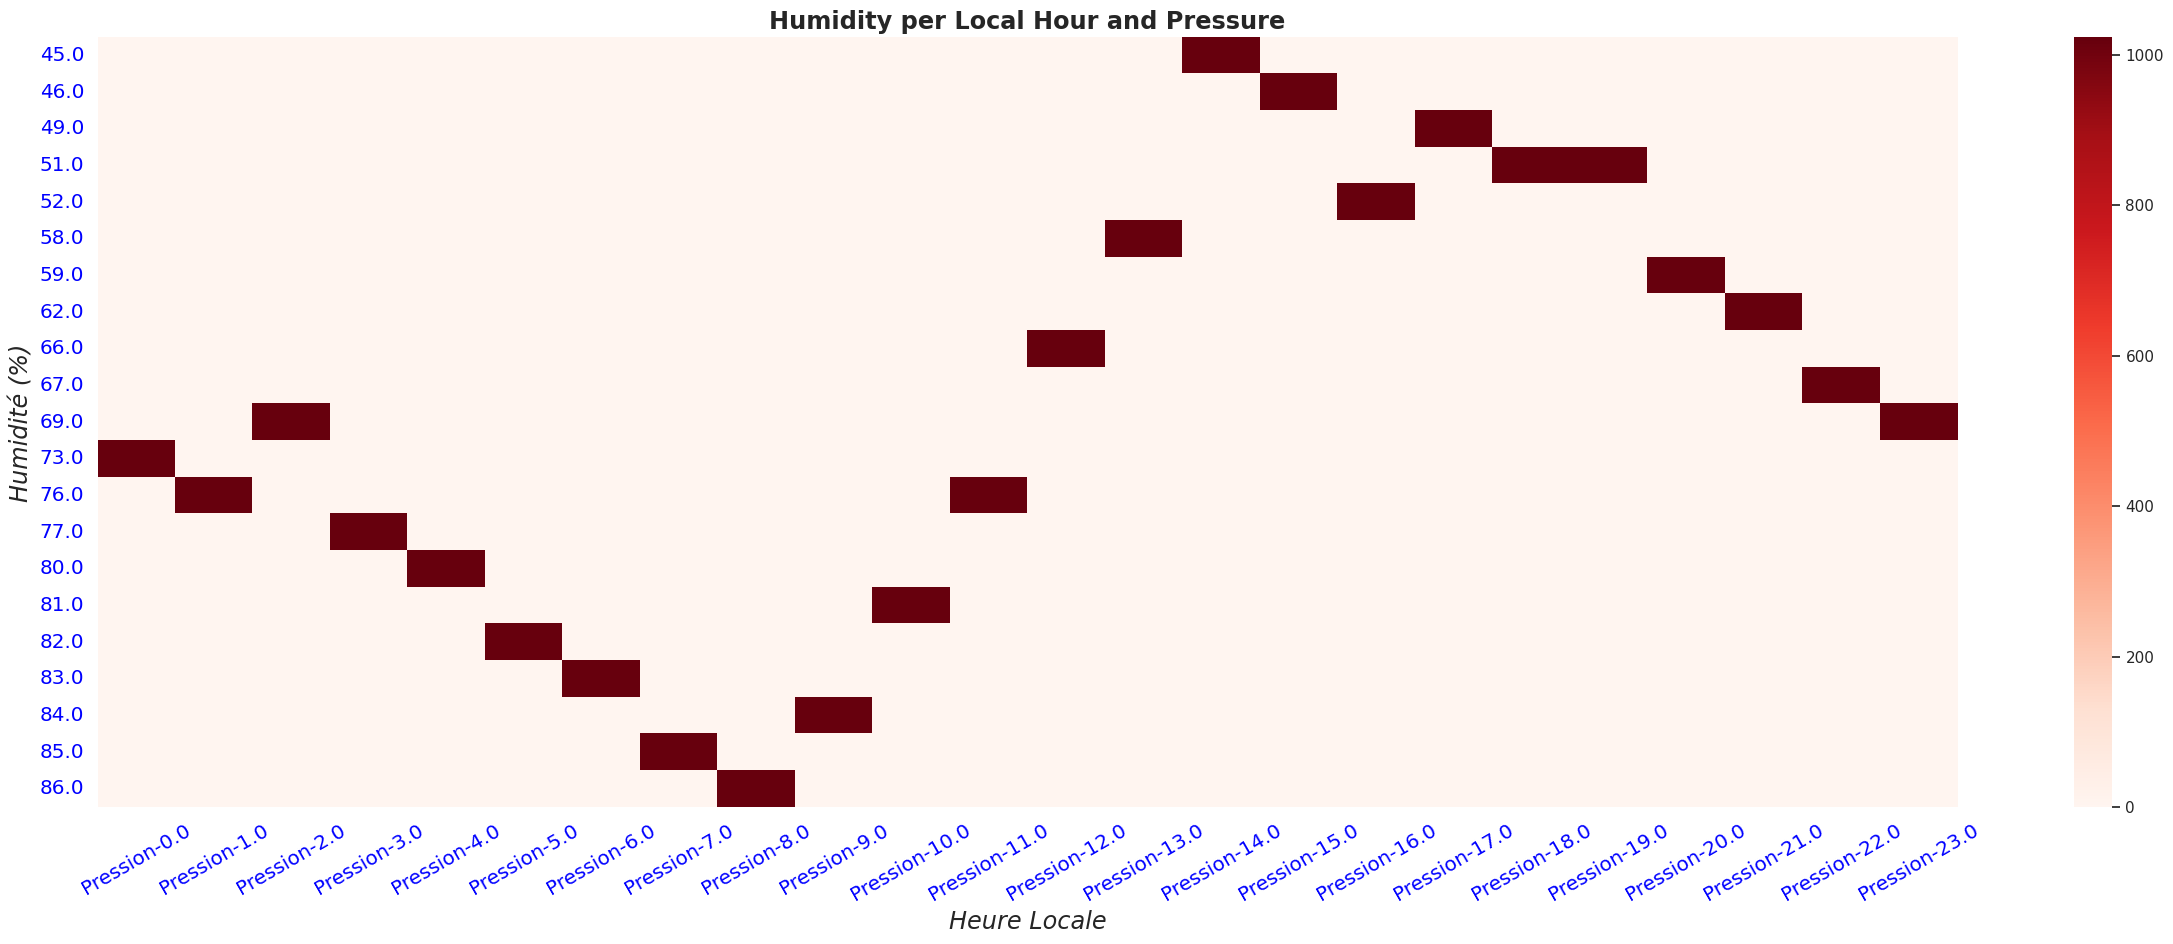

In [ ]:
import seaborn as sns

plt.figure(figsize = (30,10))
axis = sns.heatmap(myData2, cmap = 'Reds')

#Set title, xlabel and ylabel with custom parameters of size etc...
axis.set_title("Humidity per Local Hour and Pressure", fontsize='x-large', fontweight = 'bold')
axis.set_xlabel("Heure Locale", fontsize='x-large', fontstyle = "italic")
axis.set_ylabel("Humidité (%)", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 30, "color":"blue", "fontsize":"large"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"blue", "fontsize":"large"}
plt.setp(axis.get_yticklabels(), **properties2)

plt.show()

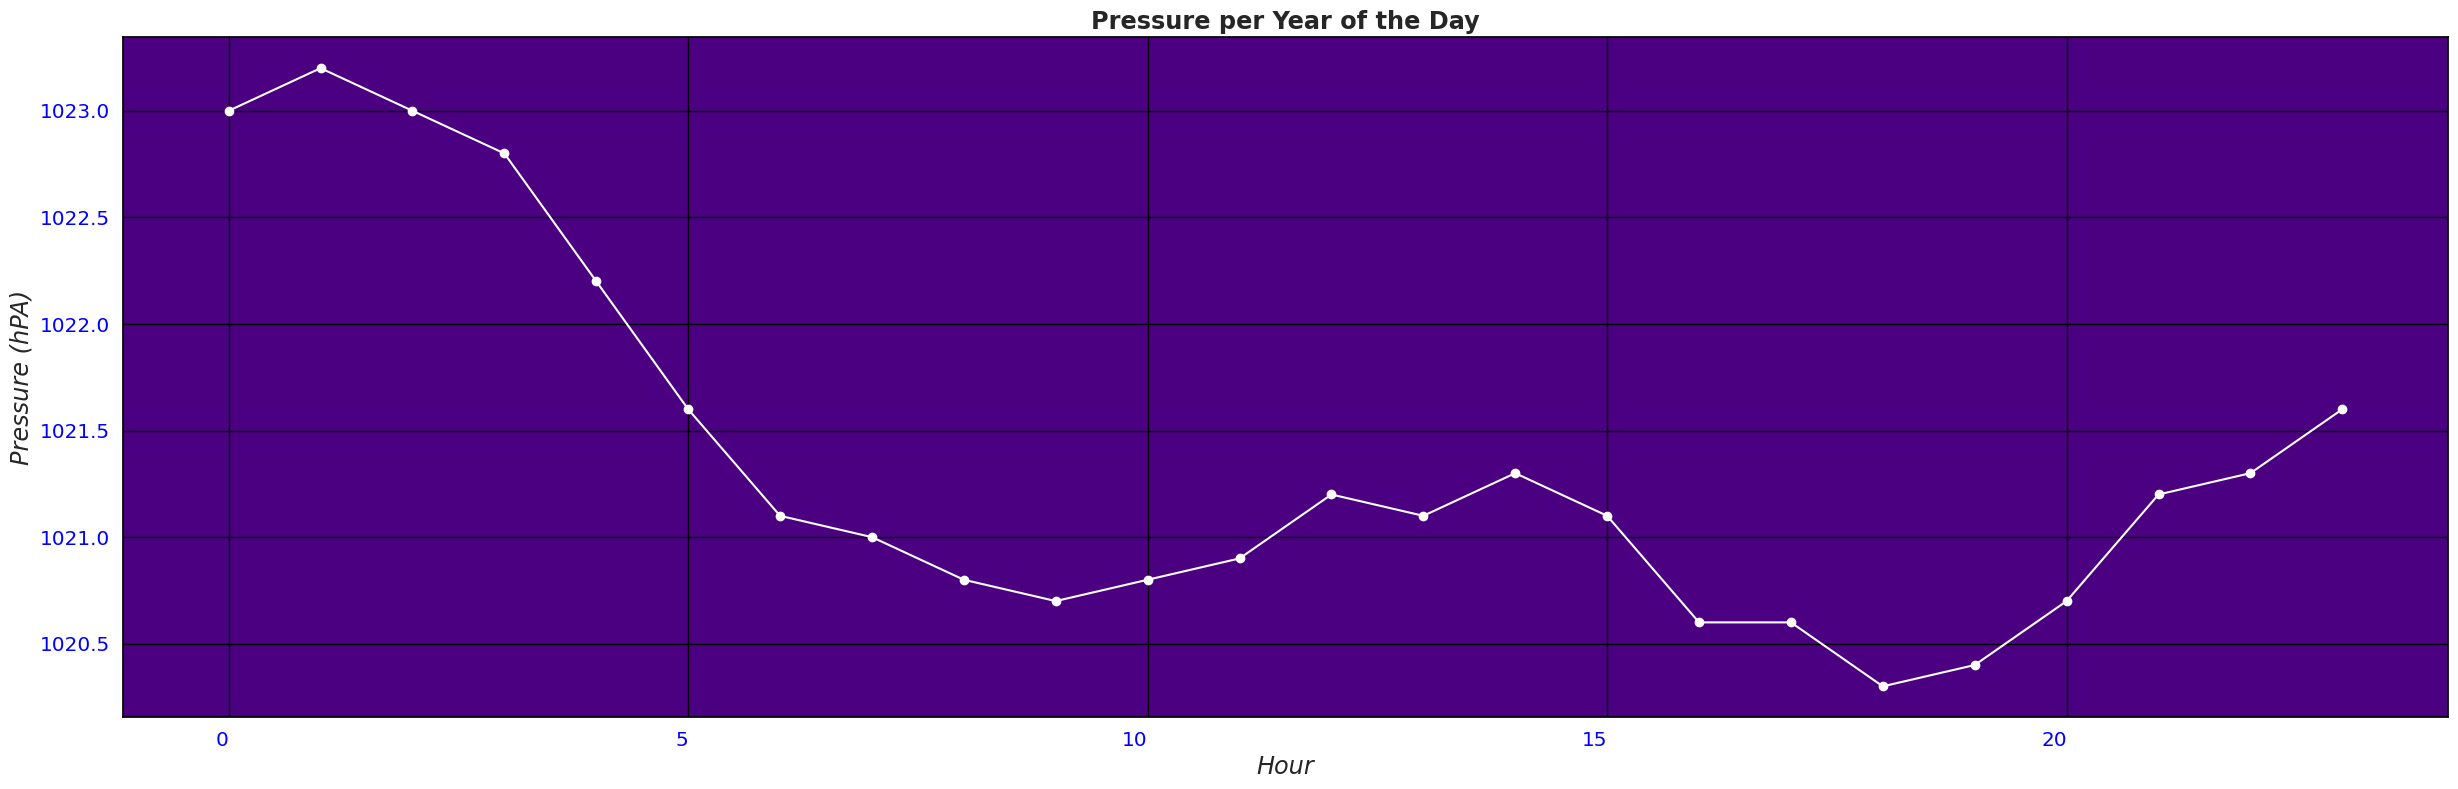

In [ ]:
sns.set_theme(style={'axes.facecolor': 'indigo','grid.color': 'black'},rc={'figure.figsize':(20, 10)})

myData['Pression'].plot(marker='o', color = 'white', linestyle='-', figsize=(30, 10), subplots=True)
plt.title("Pressure per Day of the Year", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Hour", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Pressure (hPA)", fontsize='x-large', fontstyle = "italic")
plt.xticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.yticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.show()

On remarque que la pression est minimale à midi et maximale vers minuit, il semblerait donc que la pression soit plus forte la nuit.

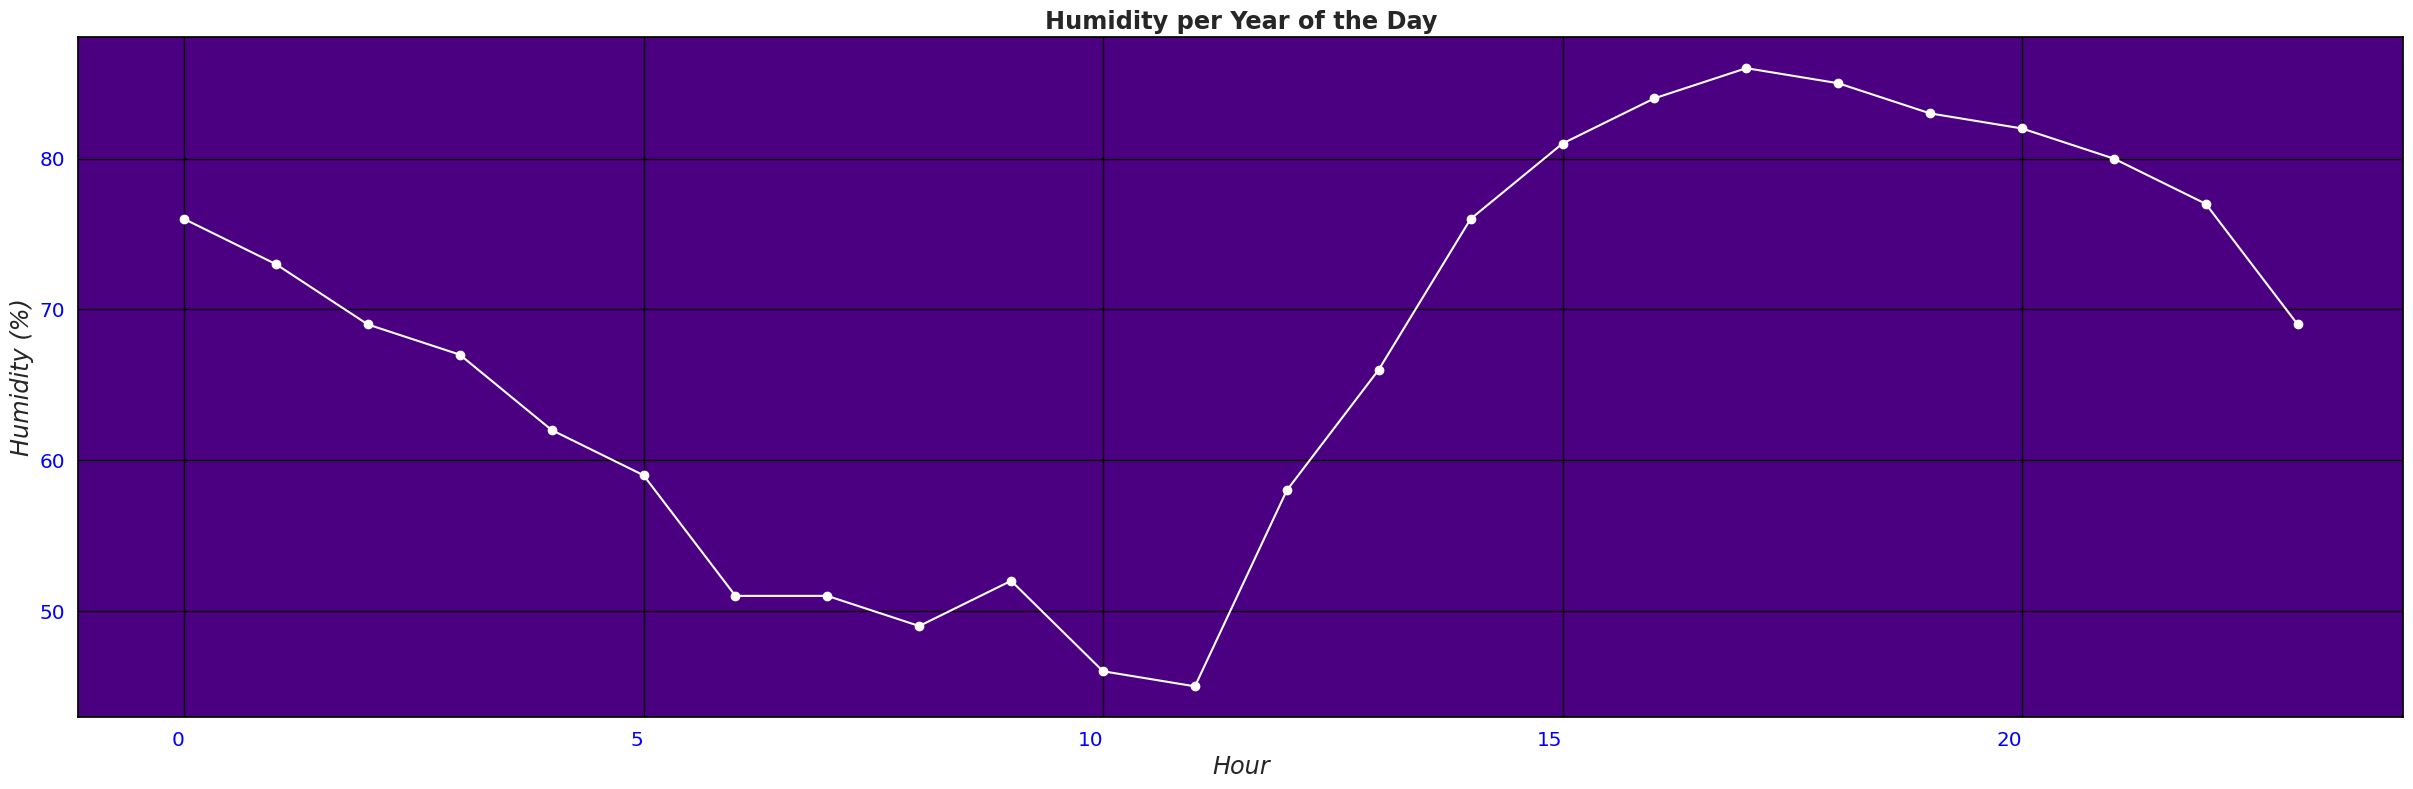

In [ ]:
sns.set_theme(style={'axes.facecolor': 'indigo','grid.color': 'black'},rc={'figure.figsize':(20, 10)})

myData['Humidité'].plot(marker='o', color = 'white', linestyle='-', figsize=(30, 10), subplots=True)
plt.title("Humidity per Day of the Year", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Hour", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Humidity (%)", fontsize='x-large', fontstyle = "italic")
plt.xticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.yticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.show()

On remarque que l'humidité est minimale à midi et maximale vers 18h, il semblerait donc que l'humidité soit moins forte quand le soleil est au plus haut.